## Import Library

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [109]:
fact= pd.read_csv('FactResellerSales.csv', encoding='UTF-16', delimiter='|')
product= pd.read_csv('Product.csv', encoding='UTF-16', delimiter='|')
geo= pd.read_csv('Geography.csv', encoding='UTF-16', delimiter='|')
teritory= pd.read_csv('SalesTerritory.csv', encoding='UTF-16', delimiter='|')
cat= pd.read_csv('ProductCategory.csv', encoding='UTF-16', delimiter='|')
subcat= pd.read_csv('ProductSubcategory.csv', encoding='UTF-16', delimiter='|')
reseller= pd.read_csv('Reseller.csv', encoding='UTF-16', delimiter='|')

## Merge Dataset

In [110]:
# Memfilter data facture
factfilt = fact[['ProductKey','ResellerKey','SalesOrderNumber','PromotionKey','CurrencyKey','SalesTerritoryKey','OrderQuantity','UnitPrice','UnitPriceDiscountPct','DiscountAmount','ProductStandardCost','TotalProductCost','SalesAmount','TaxAmt','Freight','OrderDate','DueDate','ShipDate']]

# filter data product dan menggabungkan data
prodfilt = product[['ProductKey','ProductSubcategoryKey','EnglishProductName','SafetyStockLevel', 'ReorderPoint']]
df = pd.merge(factfilt, prodfilt, on='ProductKey', how='left')

# filter data sub category dan menggabungkan data
subcatfilt = subcat[['ProductSubcategoryKey','EnglishProductSubcategoryName','ProductCategoryKey']]
df = pd.merge(df, subcatfilt, on='ProductSubcategoryKey', how='left')

# filter data category dan menggabungkan data
catfilt = cat[['ProductCategoryKey','EnglishProductCategoryName']]
df = pd.merge(df, catfilt, on='ProductCategoryKey', how='left')

# filter data reseller dan menggabungkan data
reselfilt = reseller[['ResellerKey','GeographyKey', 'BusinessType', 'ResellerName', 'NumberEmployees','ProductLine','FirstOrderYear','AnnualSales','AnnualRevenue','YearOpened']]
df = pd.merge(df, reselfilt, on='ResellerKey', how='left')

# filter data territory dan menggabungkan data
teritoryfilt = teritory[['SalesTerritoryKey','SalesTerritoryRegion', 'SalesTerritoryCountry', 'SalesTerritoryGroup']]
df = pd.merge(df, teritoryfilt, on='SalesTerritoryKey', how='left')

# filter data geography dan menggabungkan data
geofilt = geo[['GeographyKey','City', 'StateProvinceName']]
df = pd.merge(df, geofilt, on='GeographyKey', how='left')

In [111]:
df.head()

,ProductKey,ResellerKey,SalesOrderNumber,PromotionKey,CurrencyKey,SalesTerritoryKey,OrderQuantity,UnitPrice,UnitPriceDiscountPct,DiscountAmount,...,ProductLine,FirstOrderYear,AnnualSales,AnnualRevenue,YearOpened,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,City,StateProvinceName
0,349,676,SO43659,1,100,5,1,2024.994,0.0,0.0,...,Mountain,2010.0,800000,80000,1979,Southeast,United States,North America,Austell,Georgia
1,350,676,SO43659,1,100,5,3,2024.994,0.0,0.0,...,Mountain,2010.0,800000,80000,1979,Southeast,United States,North America,Austell,Georgia
2,351,676,SO43659,1,100,5,1,2024.994,0.0,0.0,...,Mountain,2010.0,800000,80000,1979,Southeast,United States,North America,Austell,Georgia
3,344,676,SO43659,1,100,5,1,2039.994,0.0,0.0,...,Mountain,2010.0,800000,80000,1979,Southeast,United States,North America,Austell,Georgia
4,345,676,SO43659,1,100,5,1,2039.994,0.0,0.0,...,Mountain,2010.0,800000,80000,1979,Southeast,United States,North America,Austell,Georgia


In [112]:
print('Informasi Dataset:')
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60855 entries, 0 to 60854
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ProductKey                     60855 non-null  int64  
 1   ResellerKey                    60855 non-null  int64  
 2   SalesOrderNumber               60855 non-null  object 
 3   PromotionKey                   60855 non-null  int64  
 4   CurrencyKey                    60855 non-null  int64  
 5   SalesTerritoryKey              60855 non-null  int64  
 6   OrderQuantity                  60855 non-null  int64  
 7   UnitPrice                      60855 non-null  float64
 8   UnitPriceDiscountPct           60855 non-null  float64
 9   DiscountAmount                 60855 non-null  float64
 10  ProductStandardCost            60855 non-null  float64
 11  TotalProductCost               60855 non-null  float64
 12  SalesAmount                

In [113]:
# Mengubah data tanggal yang masih bertipe non-datetime menjadi tipe datetime
df[['OrderDate','DueDate','ShipDate']] = df[['OrderDate','DueDate','ShipDate']].apply(pd.to_datetime)
df['FirstOrderYear'] = pd.to_datetime(df['FirstOrderYear'], format='%Y').dt.year
df['YearOpened'] = pd.to_datetime(df['YearOpened'], format='%Y').dt.year

# Menambahkan kolom tahun sebagai kolom baru untuk memudahkan analisis lebih lanjut
df['OrderYear'] = df['OrderDate'].dt.year

In [114]:
print('Info Dataset :')
df.info()

Info Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60855 entries, 0 to 60854
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductKey                     60855 non-null  int64         
 1   ResellerKey                    60855 non-null  int64         
 2   SalesOrderNumber               60855 non-null  object        
 3   PromotionKey                   60855 non-null  int64         
 4   CurrencyKey                    60855 non-null  int64         
 5   SalesTerritoryKey              60855 non-null  int64         
 6   OrderQuantity                  60855 non-null  int64         
 7   UnitPrice                      60855 non-null  float64       
 8   UnitPriceDiscountPct           60855 non-null  float64       
 9   DiscountAmount                 60855 non-null  float64       
 10  ProductStandardCost            60855 non-null  float64       
 11  

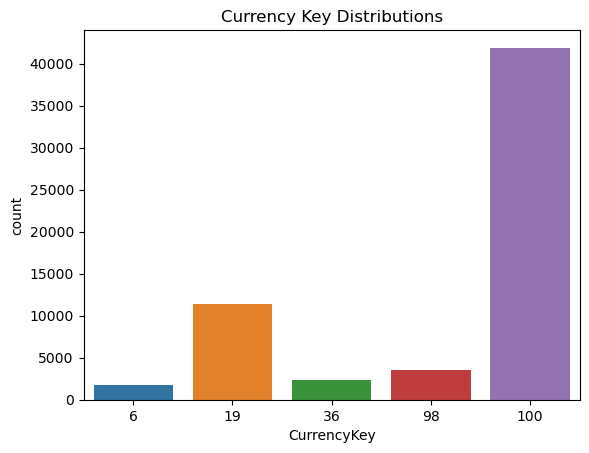

In [115]:
sns.countplot(data=df, x='CurrencyKey')
plt.title('Currency Key Distributions');

Dari dataset, terdapat kolom **CurrencyKey** yang memiliki 5 nilai unik, apakah ada kaitannya dengan nilai mata uang saat bertransaksi di tiap negara?

In [116]:
print('Daftar mata uang berdasarkan negara :')
print(df.groupby('SalesTerritoryCountry')['CurrencyKey'].unique())

Daftar mata uang berdasarkan negara :
SalesTerritoryCountry
Australia               [6]
Canada                 [19]
France            [100, 36]
Germany                [36]
United Kingdom         [98]
United States         [100]
Name: CurrencyKey, dtype: object


Dapat dilihat bahwa masing-masing negara menggunakan mata uang yang berbeda pada proses bertransaksi. Karena tidak ada penjelasan arti kode mata uang tersebut, saya mengindikasikan bahwa mata uang yang digunakan adalah mata uang resmi negara masing-masing. Australia menggunakan dolar australia, kanada menggunakan dolar kanada, Prancis menggunakan euro dan dolar amerika, Jerman menggunakan euro, UK menggunakan Poundsterling, dan US menggunakan dolar amerika.

Untuk menganalisis data penjualan ini tidak dapat dilakukan jika mata uang berbeda, sehingga diperlukan untuk mengkonversi seluruh nilai mata uang ke dalam USD sesuai dengan kurs pada rata-rata tahun yang ada. Saya menggunakan data kurs yang berasal dari https://www.exchangerates.org.uk/.

In [117]:
# membuat dataset kurs usd
kurs_usd = {
    'OrderYear': [2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2013],
    'CurrencyKey': [100, 6, 19, 36, 98, 100, 6, 19, 36, 98, 100, 6, 19, 36, 98, 100, 6, 19, 36, 98,],
    'Kurs': [1, 0.92, 0.97, 1.33, 1.55, 1, 1.03, 1.01, 1.39, 1.6, 1, 1.04, 1, 1.29, 1.59, 1, 0.97, 0.97, 1.33, 1.56]
}
df_kurs = pd.DataFrame(kurs_usd)

In [118]:
df = pd.merge(df, df_kurs, on=['OrderYear', 'CurrencyKey'], how='left')

# Konversi nilai ke dalam USD
df['UnitPriceUSD'] = df['UnitPrice'] * df['Kurs']
df['DiscountAmountUSD'] = df['DiscountAmount'] * df['Kurs']
df['SalesAmountUSD'] = df['SalesAmount'] * df['Kurs']
df['TaxAmtUSD'] = df['TaxAmt'] * df['Kurs']
df['FreightUSD'] = df['Freight'] * df['Kurs']

# hapus kolom yang sudah tidak diperlukan lagi
df.drop(['CurrencyKey','UnitPrice', 'Kurs', 'DiscountAmount', 'SalesAmount', 'TaxAmt', 'Freight'], axis=1, inplace=True)

# Exploratory Data Analysis

In [119]:
print(f' Jumlah Baris : {df.index.nunique()}')
print(f' Jumlah Kolom : {df.columns.nunique()}')

 Jumlah Baris : 60855
 Jumlah Kolom : 39


In [120]:
print('Statistika Deskriptif untuk Data Numerik :')
print(df.describe().T)

print('\n')
print('Statistika Deskriptif untuk Data Kategorik :')
print(df.describe(include='O').T)

Statistika Deskriptif untuk Data Numerik :
                         count                           mean  \
ProductKey             60855.0                     412.305431   
ResellerKey            60855.0                     339.802383   
PromotionKey           60855.0                       1.282508   
SalesTerritoryKey      60855.0                       4.581875   
OrderQuantity          60855.0                       3.522767   
UnitPriceDiscountPct   60855.0                       0.005634   
ProductStandardCost    60855.0                     438.646464   
TotalProductCost       60855.0                    1314.273509   
OrderDate                60855  2012-10-19 21:25:50.209514752   
DueDate                  60855  2012-10-31 21:26:02.987429376   
ShipDate                 60855  2012-10-26 21:26:02.987429632   
ProductSubcategoryKey  60855.0                      11.422792   
SafetyStockLevel       60855.0                     195.431304   
ReorderPoint           60855.0                 

## Unit Price

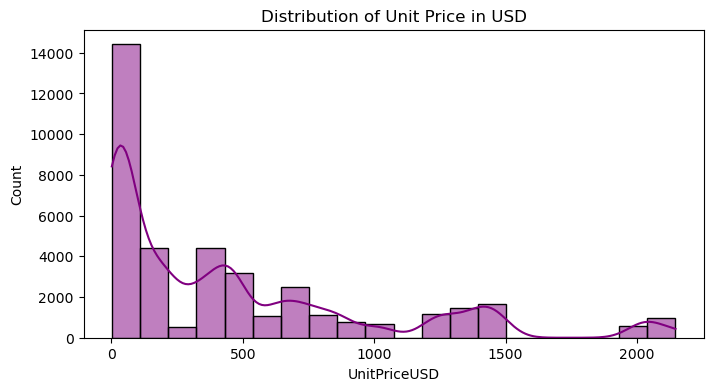

In [121]:
plt.figure(figsize=(8,4))
sns.histplot(data=df[df['SalesTerritoryCountry']=='United States'], x='UnitPriceUSD', bins=20, kde=True, color='purple')
plt.title('Distribution of Unit Price in USD');

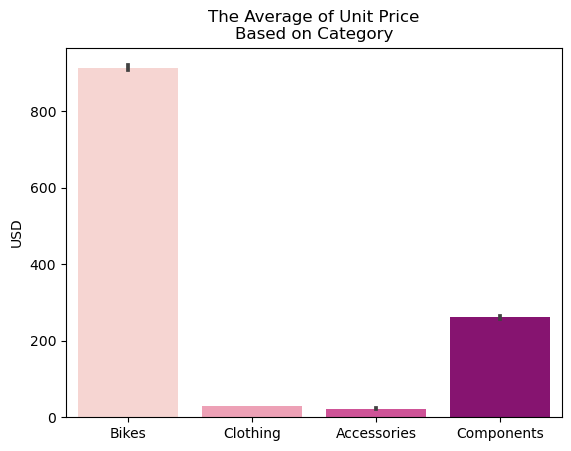

In [122]:
sns.barplot(data=df, x='EnglishProductCategoryName', y='UnitPriceUSD', palette='RdPu')
plt.title('The Average of Unit Price\nBased on Category')
plt.xlabel('')
plt.ylabel('USD')
plt.show()

Dapat dilihat bahwa kategori **Bikes** memiliki rata-rata harga paling mahal berkisar **900 USD**, diikuti kategori **Components** berkisar **260 USD**, **Clothing** dengan **29 USD**, dan terakhir **Accessories** dengan **22 USD**

## Orders Number

In [123]:
df_jumlah_transaksi = df.groupby('OrderDate').size().reset_index(name='TotalOrders')
df_jumlah_reseller = df.groupby('OrderDate')['ResellerName'].nunique().reset_index(name='TotalResellers')
df_jumlah_kuantitas = df.groupby('OrderDate')['OrderQuantity'].sum().reset_index(name='TotalQuantity')

df_gabung = pd.merge(df_jumlah_transaksi, df_jumlah_reseller, on='OrderDate', how='left')
df_gabung = pd.merge(df_gabung, df_jumlah_kuantitas, on='OrderDate', how='left')
df_gabung.tail(15)

,OrderDate,TotalOrders,TotalResellers,TotalQuantity
25,2013-01-28,3754,183,15139
26,2013-02-28,3760,174,14774
27,2013-03-30,1810,96,7457
28,2013-04-30,2904,177,10584
29,2013-05-30,3029,174,10574
30,2013-06-30,1382,93,4637
31,2013-07-31,2076,174,6370
32,2013-08-28,1,1,1
33,2013-08-29,2176,173,6593
34,2013-09-28,4,2,8


Diketahui bahwa pemesanan dilakukan setiap bulan atau dalam rentang 30 hari sekali, namun terjadi perbedaan waktu pemesanan untuk beberapa Reseller pada bulan Agustus, September, Oktober, dan Nopember tahun 2013 dimana memesan 1 hari lebih awal dari tanggal biasanya.

**Karena saya ingin melihat trend penjualan, dan dikethaui ada beberapa pengiriman yang dilakukan 2 kali dalam periode bulan, maka saya akan menyatukan tanggal order tersebut berdasar bulan untuk dapat melihat trend sebenarnya.**

In [124]:
df_trend = df.copy()

In [125]:
# menyatukan penjualan perbulan dengan mengganti tanggal yang memiliki tanggal order lebih awal sehari
df_trend.loc[df_trend['OrderDate'] == '2013-08-28', 'OrderDate'] = '2013-08-29'
df_trend.loc[df_trend['OrderDate'] == '2013-09-28', 'OrderDate'] = '2013-09-29'
df_trend.loc[df_trend['OrderDate'] == '2013-10-28', 'OrderDate'] = '2013-10-29'
df_trend.loc[df_trend['OrderDate'] == '2013-11-28', 'OrderDate'] = '2013-11-29'

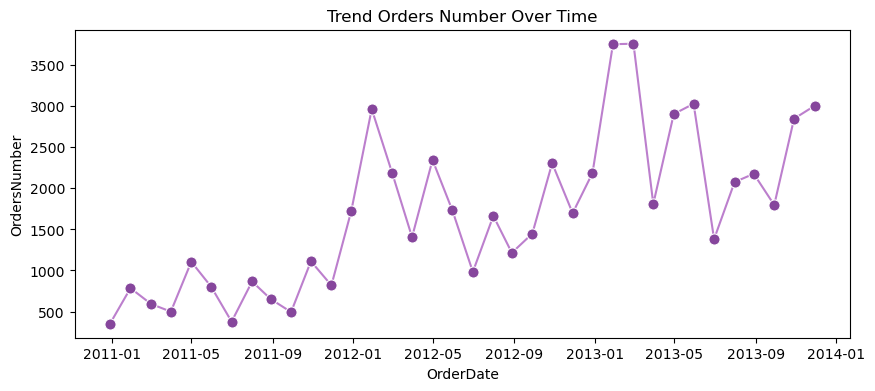

In [126]:
plt.figure(figsize=(10,4))
orders = df_trend.groupby('OrderDate').size().reset_index(name='OrdersNumber')
sns.lineplot(data=orders, x='OrderDate', y='OrdersNumber', ci=False, marker='o', markersize=8, markerfacecolor='#86469C', color='#BC7FCD')
plt.title('Trend Orders Number Over Time');

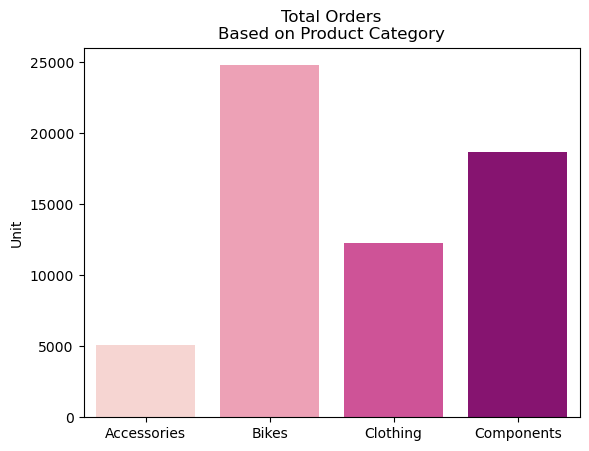

In [127]:
productcat = df_trend.groupby('EnglishProductCategoryName').size().reset_index(name='OrdersNumber')
sns.barplot(data=productcat, x='EnglishProductCategoryName', y='OrdersNumber', palette='RdPu')
plt.title('Total Orders\nBased on Product Category')
plt.xlabel('')
plt.ylabel('Unit')
plt.show()

Dapat dilihat bahwa barang yang dijual memiliki rentang harga **0 hingga 2000-an USD** per unitnya. Dari distribusi harga, terlihat bahwa barang **paling banyak** memiliki harga **di bawah 100 USD**.

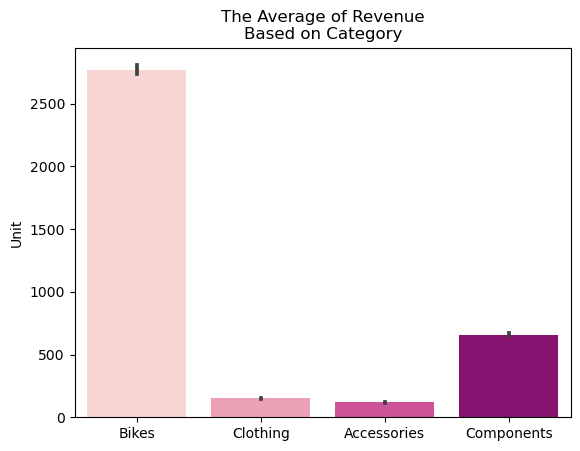

In [128]:
sns.barplot(data=df, x='EnglishProductCategoryName', y='SalesAmountUSD', palette='RdPu')
plt.title('The Average of Revenue\nBased on Category')
plt.xlabel('')
plt.ylabel('Unit')
plt.show()

## Orders Quantity

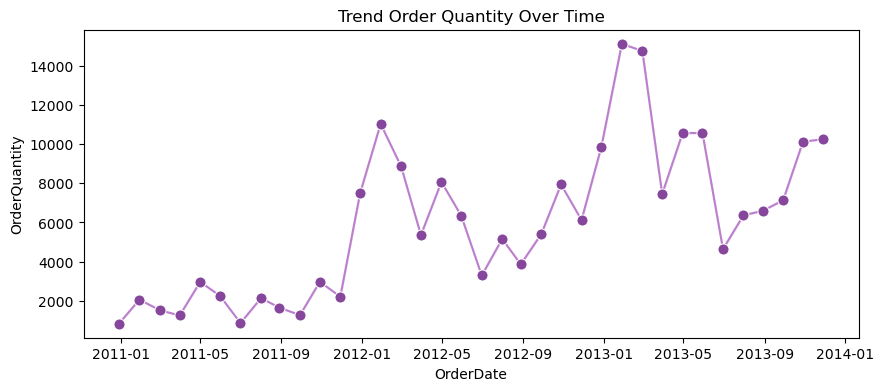

In [129]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,4))
sns.lineplot(data=df_trend, x='OrderDate',y='OrderQuantity',ci=False, estimator='sum', marker='o', markersize=8, markerfacecolor='#86469C', color='#BC7FCD')
plt.title('Trend Order Quantity Over Time');

Dari grafik di atas didapatkan bahwa:
- Kuantitas barang yang dipesan mengalami trend kenaikan sepanjang waktu
- Terjadi kenaikan jumlah barang yang dipesan pada periode natal dan tahun baru yang cukup signifikan di setiap tahunnya

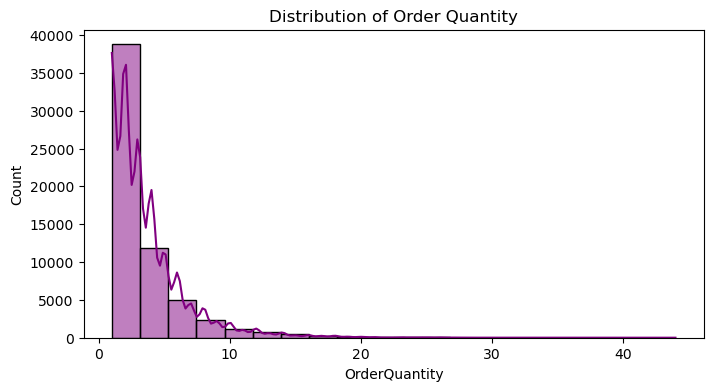

In [130]:
plt.figure(figsize=(8,4))
sns.histplot(df['OrderQuantity'], kde=True, bins=20, color='Purple')
plt.title('Distribution of Order Quantity');

Dapat dilihat dari distribusi kuantitas barang yang dipesan, bahwa sebagian besar reseller memesan barang per itemnya adalah kurang dari 5 unit.

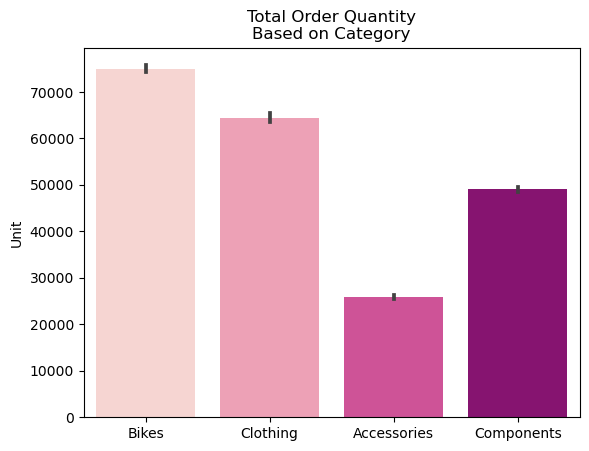

In [131]:
sns.barplot(data=df, x='EnglishProductCategoryName', y='OrderQuantity', palette='RdPu', estimator='sum')
plt.title('Total Order Quantity\nBased on Category')
plt.xlabel('')
plt.ylabel('Unit')
plt.show()

Dari grafik didapatkan bahwa kategori **Bikes** menjadi kategori barang paling banyak dipesan. Diikuti dengan **Closthing** di posisi kedua, **Components** ketiga, dan terakhir **Accessories** yang paling sedikit dipesan.

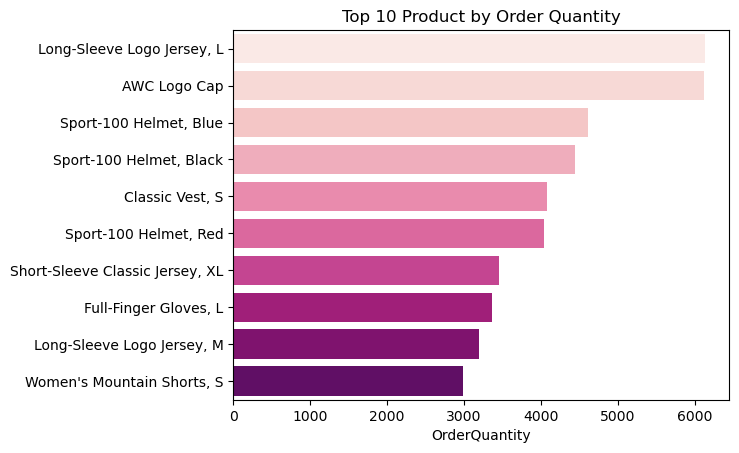

In [132]:
top10qttyprod = df.groupby('EnglishProductName')['OrderQuantity'].sum().sort_values(ascending=False).head(10)
top10qttyprod = pd.DataFrame(top10qttyprod).reset_index()
sns.barplot(data=top10qttyprod, y='EnglishProductName', x='OrderQuantity', palette='RdPu')
plt.ylabel('')
plt.title('Top 10 Product by Order Quantity');

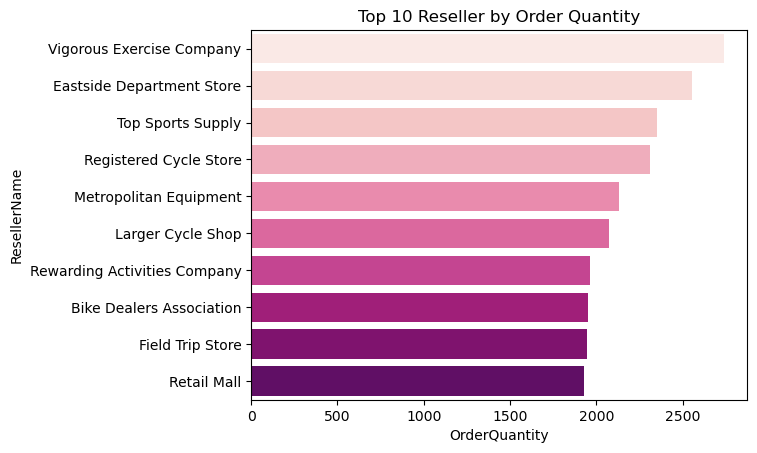

In [133]:
top10qtty = df.groupby('ResellerName')['OrderQuantity'].sum().sort_values(ascending=False).head(10)
top10qtty = pd.DataFrame(top10qtty).reset_index()
sns.barplot(data=top10qtty, y='ResellerName', x='OrderQuantity', palette='RdPu')
plt.title('Top 10 Reseller by Order Quantity');

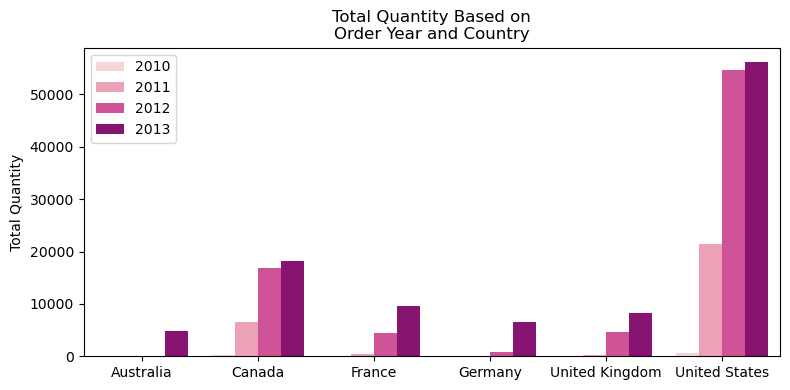

In [134]:
qttycountry = df.groupby(['SalesTerritoryCountry', 'OrderYear'])['OrderQuantity'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=qttycountry, x='SalesTerritoryCountry', y='OrderQuantity', hue='OrderYear', palette='RdPu')

plt.legend(loc='upper left')
plt.title('Total Quantity Based on\nOrder Year and Country')
plt.ylabel('Total Quantity')
plt.xlabel('')
plt.tight_layout();

Dari grafik di atas diketahui bahwa jumlah barang yang dipesan mengalami kenaikan tiap tahun di semua negara. Dimana USA menjadi negara paling besar jumlah kuantitasnya, dikuti dengan Kanada di posisi kedua, sisanya prancis, UK, Jerman, dan Australia di posisi ke 3,4,dan 5.

## Revenue

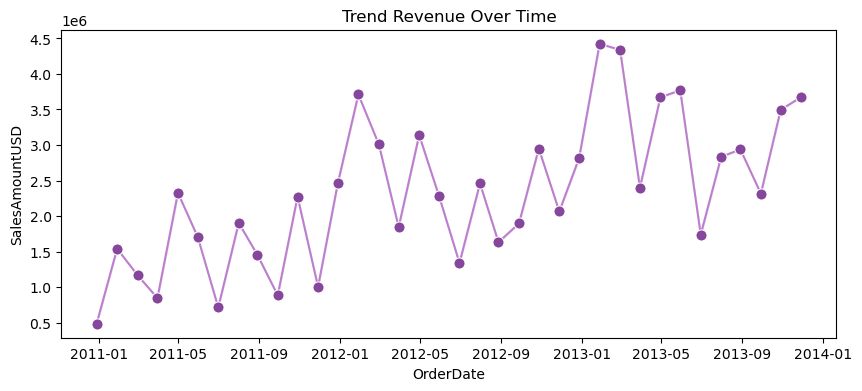

In [135]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_trend, x='OrderDate',y='SalesAmountUSD', ci=False, estimator='sum', marker='o', markersize=8, markerfacecolor='#86469C', color='#BC7FCD')
plt.title('Trend Revenue Over Time');

Dari grafik di atas didapatkan bahwa:
- Revenue mengalami trend kenaikan selama 3 tahun terakhir
- Kenaikan revenue tertinggi terjadi pada periode natal dan tahun baru di setiap tahunnya, hal ini disebabkan terjadinya kenaikan jumlah barang yang dipesan pada periode tersebut.

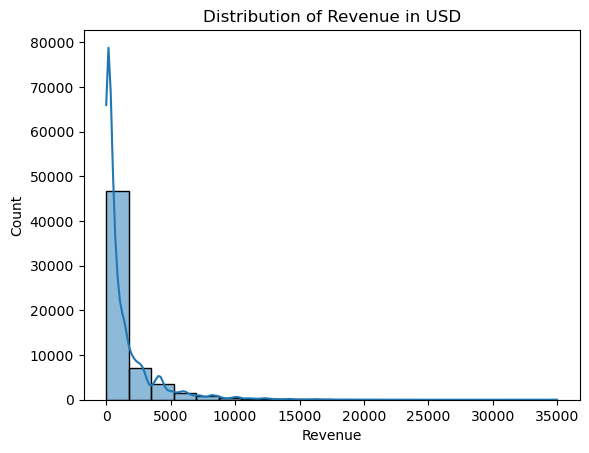

In [136]:
sns.histplot(data=df, x='SalesAmountUSD', bins=20, kde=True)
plt.title('Distribution of Revenue in USD')
plt.xlabel('Revenue');

Dari distribusi revenue di atas, telihat bahwa dalam setiap pesanan mendapatkan revenue dalam rentang 0 hingga 35000 USD. Sebagian besar pesanan mendapatkan revenue kurang dari 2000 USD.

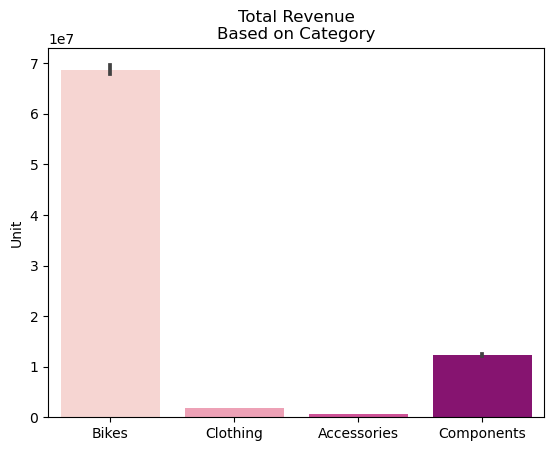

In [137]:
sns.barplot(data=df, x='EnglishProductCategoryName', y='SalesAmountUSD', palette='RdPu', estimator='sum')
plt.title('Total Revenue\nBased on Category')
plt.xlabel('')
plt.ylabel('Unit')
plt.show()

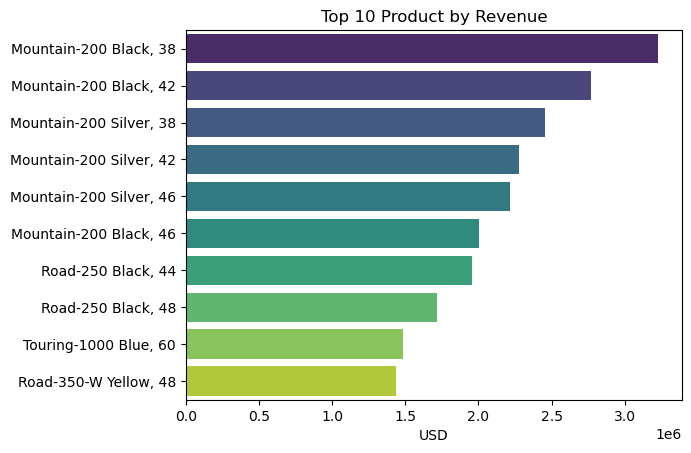

In [138]:
top10rvnprod = df.groupby('EnglishProductName')['SalesAmountUSD'].sum().sort_values(ascending=False).head(10)
top10rvnprod = pd.DataFrame(top10rvnprod).reset_index()
sns.barplot(data=top10rvnprod, y='EnglishProductName', x='SalesAmountUSD', palette='viridis')
plt.ylabel('')
plt.xlabel('USD')
plt.title('Top 10 Product by Revenue');

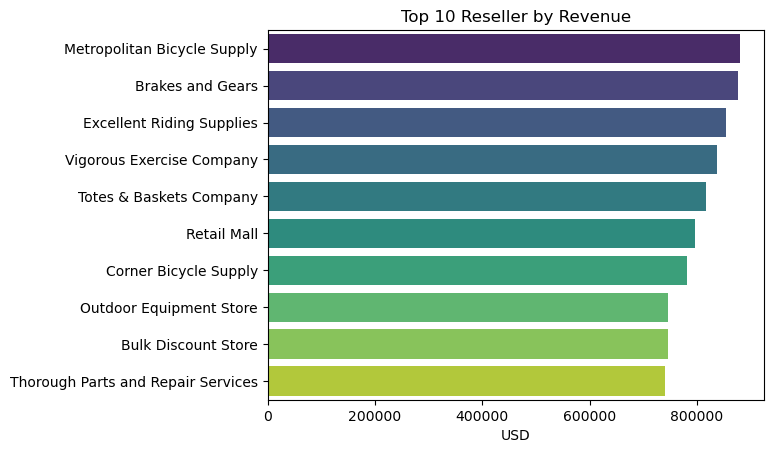

In [139]:
top10slsamt = df.groupby('ResellerName')['SalesAmountUSD'].sum().sort_values(ascending=False).head(10)
top10slsamt = pd.DataFrame(top10slsamt).reset_index()
sns.barplot(data=top10slsamt, y='ResellerName', x='SalesAmountUSD', palette='viridis', estimator='sum')
plt.title('Top 10 Reseller by Revenue')
plt.ylabel('')
plt.xlabel('USD');

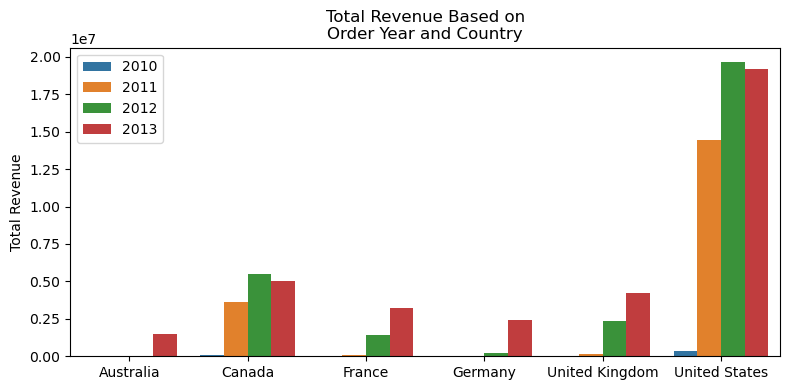

In [140]:
qttycountry = df.groupby(['SalesTerritoryCountry', 'OrderYear'])['SalesAmountUSD'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=qttycountry, x='SalesTerritoryCountry', y='SalesAmountUSD', hue='OrderYear')

plt.legend(loc='upper left')
plt.title('Total Revenue Based on\nOrder Year and Country')
plt.ylabel('Total Revenue')
plt.xlabel('')
plt.tight_layout();

Dari grafik di atas diketahui bahwa pendapatan Revenue cenderung mengalami trend peningkatan di setiap negara dalam tiga tahun terakhir. Namun USA dan Kanada terlihat mengalami perlambatan dalam setahun terakhir.

## Discount

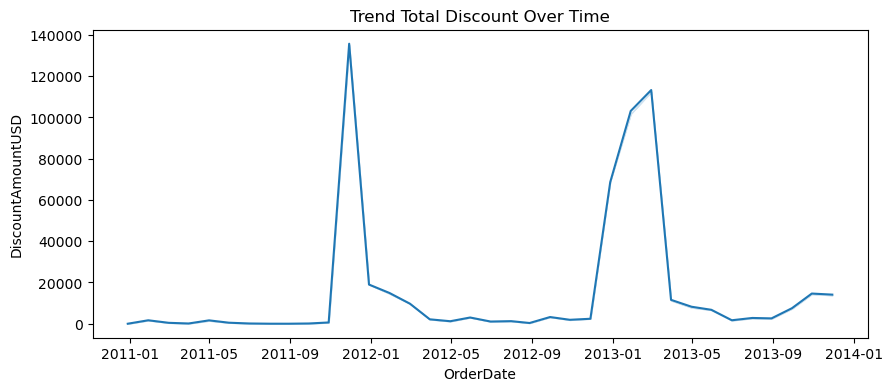

In [141]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_trend, x='OrderDate',y='DiscountAmountUSD',ci=False, estimator='sum')
plt.title('Trend Total Discount Over Time');

Dari grafik terlihat bahwa perusahaan memasang diskon yang signifikan di setiap periode natal dan tahun baru.

In [142]:
df_diskon = df[df['UnitPriceDiscountPct']>0]
df_jumlah_diskon = df_diskon.groupby('OrderDate')['DiscountAmountUSD'].sum().reset_index(name='TotalDiscount')
df_jumlah_revenue = df_diskon.groupby('OrderDate')['SalesAmountUSD'].sum().reset_index(name='TotalRevenue')
df_jumlah_kuantitas = df_diskon.groupby('OrderDate')['OrderQuantity'].sum().reset_index(name='TotalQuantity')

df_gabung = pd.merge(df_jumlah_diskon, df_jumlah_revenue, on='OrderDate', how='left')
df_gabung = pd.merge(df_gabung, df_jumlah_kuantitas, on='OrderDate', how='left')

In [185]:
df_gabung

,OrderDate,TotalDiscount,TotalRevenue,TotalQuantity
0,2011-01-29,1666.211309,80985.764859,123
1,2011-03-01,436.396200,21210.990000,33
2,2011-03-31,112.902970,5209.493870,88
3,2011-05-01,1628.131331,78996.527139,129
4,2011-05-31,492.042724,23992.524776,86
5,2011-07-01,114.668936,5618.775844,14
6,2011-08-01,7.620630,224.495566,44
7,2011-08-29,1.558228,76.353172,14
8,2011-09-29,112.503140,5371.579870,43
9,2011-10-29,605.203792,28684.876238,115


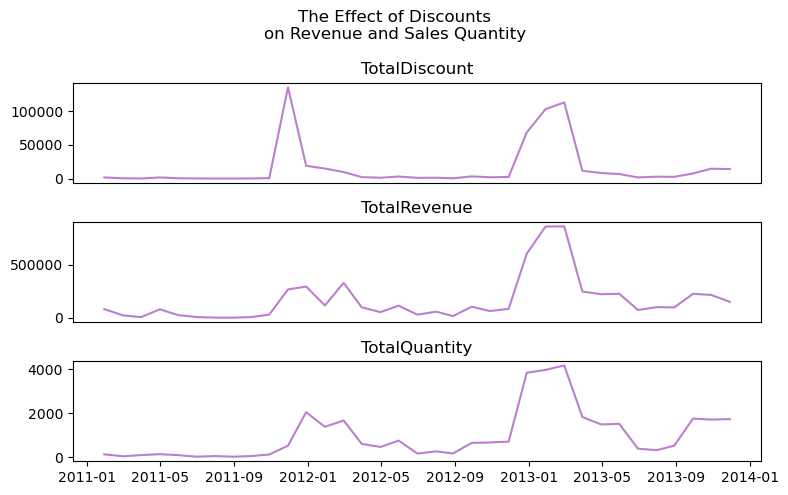

In [143]:
# Membuat subplot 1x3
fig, axs = plt.subplots(3, 1, figsize=(8, 5))

# Daftar variabel
variables = ['TotalDiscount', 'TotalRevenue', 'TotalQuantity']

# Plot tren garis untuk setiap variabel
for i, var in enumerate(variables):
    axs[i].plot(df_gabung['OrderDate'], df_gabung[var], color='#BC7FCD')
    axs[i].set_title(var)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
        
axs[0].set_xticks([])  
axs[1].set_xticks([]) 
plt.suptitle('The Effect of Discounts\non Revenue and Sales Quantity')
plt.tight_layout()
plt.show()

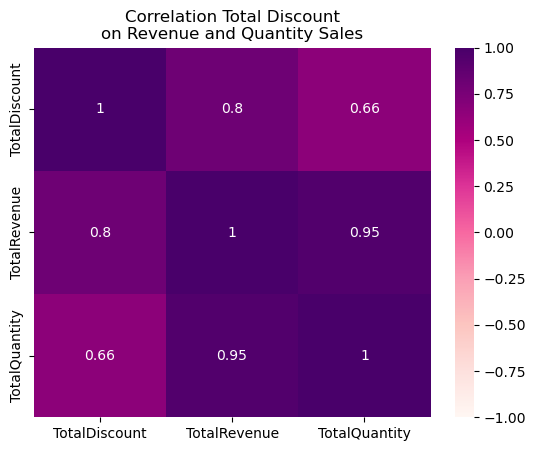

In [144]:
corr = df_gabung.drop('OrderDate',axis=1).corr()
sns.heatmap(corr, annot=True, vmin=-1, cmap='RdPu')
plt.title('Correlation Total Discount\non Revenue and Quantity Sales');

In [145]:
df.columns

Index(['ProductKey', 'ResellerKey', 'SalesOrderNumber', 'PromotionKey',
       'SalesTerritoryKey', 'OrderQuantity', 'UnitPriceDiscountPct',
       'ProductStandardCost', 'TotalProductCost', 'OrderDate', 'DueDate',
       'ShipDate', 'ProductSubcategoryKey', 'EnglishProductName',
       'SafetyStockLevel', 'ReorderPoint', 'EnglishProductSubcategoryName',
       'ProductCategoryKey', 'EnglishProductCategoryName', 'GeographyKey',
       'BusinessType', 'ResellerName', 'NumberEmployees', 'ProductLine',
       'FirstOrderYear', 'AnnualSales', 'AnnualRevenue', 'YearOpened',
       'SalesTerritoryRegion', 'SalesTerritoryCountry', 'SalesTerritoryGroup',
       'City', 'StateProvinceName', 'OrderYear', 'UnitPriceUSD',
       'DiscountAmountUSD', 'SalesAmountUSD', 'TaxAmtUSD', 'FreightUSD'],
      dtype='object')

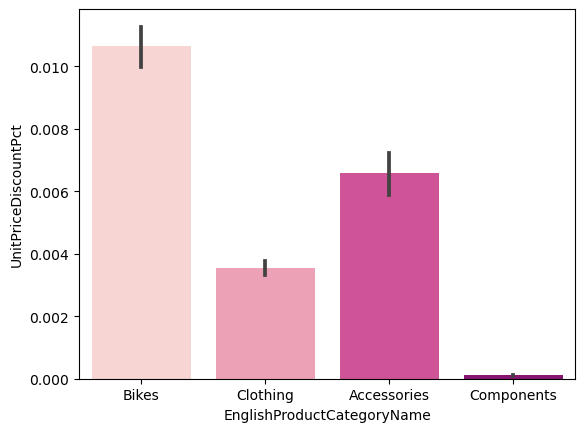

In [146]:
sns.barplot(df, x='EnglishProductCategoryName', y='UnitPriceDiscountPct', estimator='mean', palette='RdPu');

## Order Processing

In [147]:
# menambahkan kolom order processing untuk melihat selisih waktu pemesanan dan pengiriman
df['OrderProcessing']=(df['ShipDate']-df['OrderDate']).dt.days

In [148]:
df['OrderProcessing'].value_counts()

OrderProcessing
7    60846
8        9
Name: count, dtype: int64

Semua pesanan diproses dalam 7 hari kecuali pesanan yang memesan pada tanggal 28 harus menghabiskan waktu 8 hari. Ini artinya semua pengiriman dilakukan dalam waktu yang sama

In [149]:
LateShip = (df['ShipDate']>df['DueDate']).sum()
print(f'Jumlah pesanan yang melebihi deadline pengiriman : {LateShip} pesanan')

Jumlah pesanan yang melebihi deadline pengiriman : 0 pesanan


Semua pesanan diproses sudah baik tanpa ada keterlambatan pengiriman.

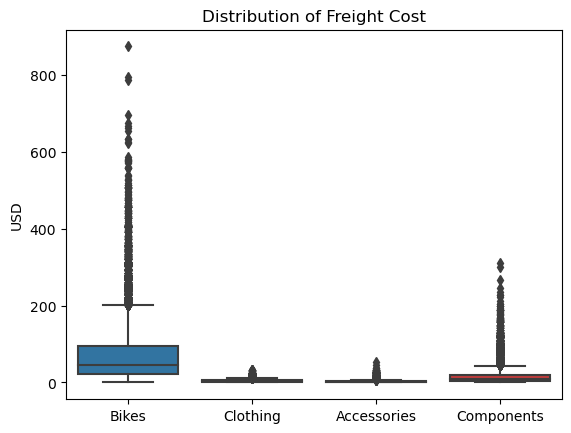

In [150]:
sns.boxplot(data=df, x='EnglishProductCategoryName',y='FreightUSD')
plt.title('Distribution of Freight Cost')
plt.xlabel('')
plt.ylabel('USD')
plt.show()

Berdasarkan distribusi biaya pengangkutan, kategori Bikes memiliki biaya yang paling besar, diikuti dengan Component, Clothing, dan yang terakhir Accessories. Saya mengindikasikan bahwa ukuran dan berat menjadi indikator yang mempengaruhi harga pengangkutan.

## Reseller

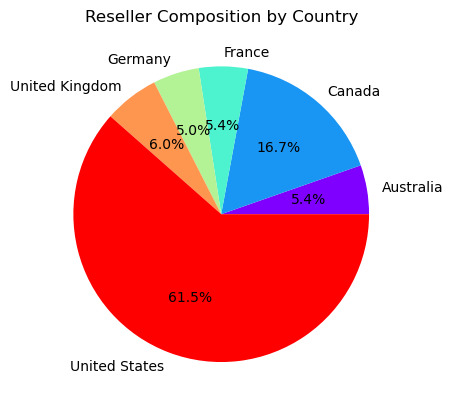

In [151]:
df.groupby('SalesTerritoryCountry')['ResellerName'].nunique().plot(kind='pie', cmap='rainbow', autopct=('%.1f%%'))
plt.ylabel('')
plt.title('Reseller Composition by Country');

Sebagian besar reseller berasal dari US sebesar 61.5%, diikuti Kanada di posisi kedua dengan 16.7%, kemudikan sisanya berasal dari UK, Perancis, Australia, dan Jerman di posisi ke- 3, 4, 5, dan 6.

In [152]:
trend_jumlah_reseller = df_trend.groupby('OrderDate')['ResellerName'].nunique().reset_index(name='TotalResellers')

In [153]:
resellernbr = df_trend['ResellerKey'].nunique()
print(f'Total Reseller yang Telah Melakukan Pemesanan : {resellernbr}')

Total Reseller yang Telah Melakukan Pemesanan : 635


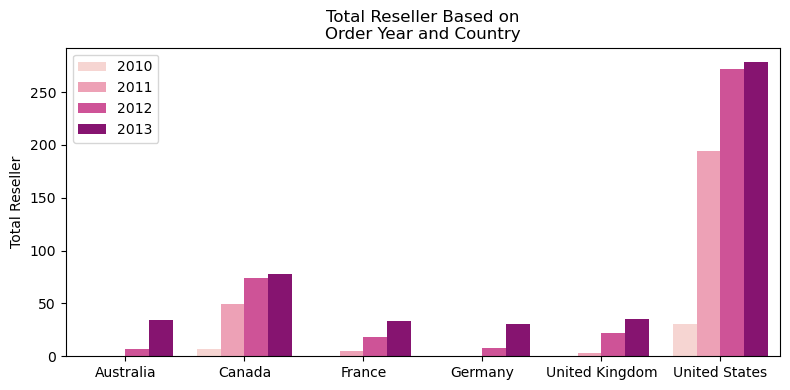

In [154]:
reselnbr = df.groupby(['SalesTerritoryCountry', 'OrderYear'])['ResellerKey'].nunique().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=reselnbr, x='SalesTerritoryCountry', y='ResellerKey', hue='OrderYear', palette='RdPu')

plt.legend(loc='upper left')
plt.title('Total Reseller Based on\nOrder Year and Country')
plt.ylabel('Total Reseller')
plt.xlabel('')
plt.tight_layout();

Jika dilihat berdasarkan negara, jumlah reseller yang memesan juga mengalami peningkatan di setiap tahun.

In [155]:
grouped = df.groupby(['SalesTerritoryCountry', 'FirstOrderYear'])['ResellerKey'].nunique().reset_index()

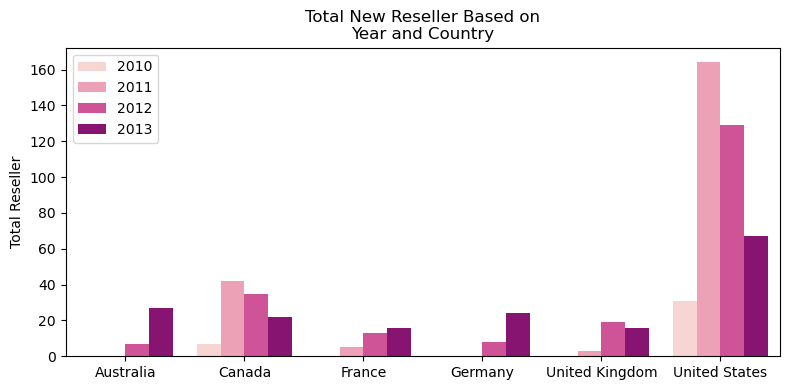

In [156]:
plt.figure(figsize=(8,4))
sns.barplot(data=grouped, x='SalesTerritoryCountry', y='ResellerKey', hue='FirstOrderYear', palette='RdPu')

plt.legend(loc='upper left')
plt.title('Total New Reseller Based on\nYear and Country')
plt.ylabel('Total Reseller')
plt.xlabel('')
plt.tight_layout();

Terlihat bahwa awal bisnis pada tahun 2010 hanya memiliki Reseller berasal dari US dan Kanada. Kemudian tahun 2011 mulai berekspansi ke UK dan Perancis, dan terakhir Jerman dan Australia pada tahun 2012. Dari trend Reseller baru yang masuk setiap tahun, negara di luar Benua Amerika cenderung mengalami peningkatan, namun US dan Kanada mengalami penurunan dalam 3 tahun terakhir.

## Reseller Retention

In [157]:
# Mengelompokkan data berdasrakan reseller dan tanggal
reselorder = df_trend.groupby(['ResellerKey','OrderDate'], as_index=False).agg(OrderCnt=('OrderDate','count'))
reselorder['FirstOrderDate'] = reselorder.groupby('ResellerKey')['OrderDate'].transform('min')
reselorder['PeriodNum']=((reselorder['OrderDate']-reselorder['FirstOrderDate']).dt.days/30+1).astype('int')
reselorder['OrderDate'] = reselorder['OrderDate'].dt.date

# Membuat pivot table
df_cohort_pivot = pd.pivot_table(reselorder, index='FirstOrderDate', columns='PeriodNum', values='ResellerKey', aggfunc=pd.Series.nunique)
cohort_size = df_cohort_pivot.iloc[:, 0]
df_retention_cohort = df_cohort_pivot.divide(cohort_size, axis=0)
df_retention_cohort.head()

PeriodNum,1,3,4,7,10,13,16,19,22,25,28,31,34
FirstOrderDate,,,,,,,,,,,,,
2010-12-29,1.0,NaN,0.947368,0.947368,0.921053,0.631579,0.657895,0.631579,0.736842,0.605263,0.605263,0.578947,0.578947
2011-01-29,1.0,NaN,0.973333,0.933333,0.960000,0.666667,0.600000,0.666667,0.640000,0.506667,0.520000,0.506667,0.493333
2011-03-01,1.0,NaN,0.900000,0.933333,0.933333,0.533333,0.516667,0.566667,0.500000,0.450000,0.516667,0.483333,0.483333
2011-03-31,1.0,NaN,0.500000,0.500000,0.750000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN
2011-05-01,1.0,NaN,0.529412,0.764706,0.588235,0.529412,0.411765,0.352941,0.352941,0.411765,0.235294,0.352941,NaN


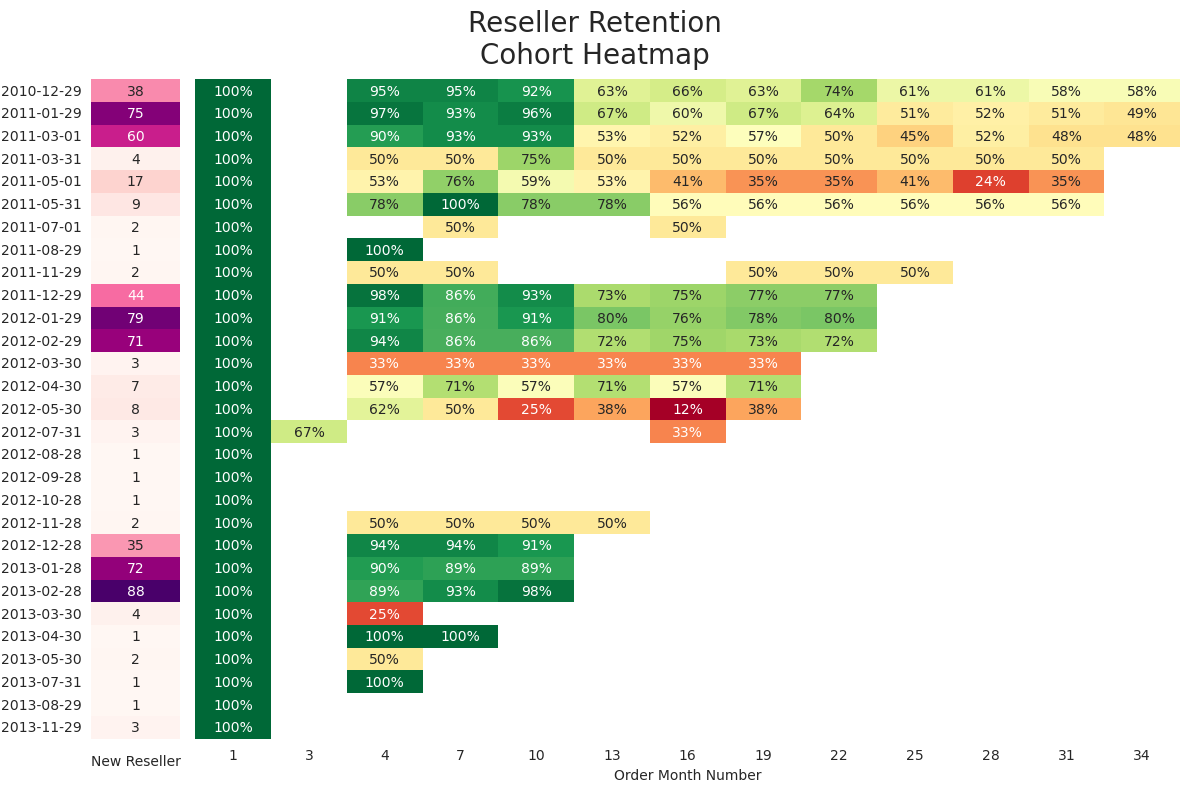

In [158]:
# Membuat heatmap untuk melihat retensi Reseller
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns



with sns.axes_style('white'):

    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios':[1, 11]})

    # user retention cohort
    sns.heatmap(df_retention_cohort, annot=True, fmt='.0%', cmap='RdYlGn', ax=ax[1], xticklabels=df_retention_cohort.columns, cbar=False)
    ax[1].set(xlabel='Order Month Number', ylabel='')

    # cohort size
    df_cohort_size = pd.DataFrame(cohort_size)
    white_cmap = mcolors.ListedColormap(['grey'])
    sns.heatmap(df_cohort_size, annot=True, cbar=False, fmt='g', cmap='RdPu', ax=ax[0] )
    ax[0].tick_params(bottom=False)
    ax[0].set(xlabel='New Reseller', ylabel='',  yticklabels=(df_retention_cohort.index).strftime("%Y-%m-%d"), xticklabels=[])
    
    plt.suptitle('Reseller Retention\nCohort Heatmap', fontsize=20)
    fig.tight_layout()

Dari heatmap di atas ada beberapa hal yang menarik:
- Reseller baru paling banyak memesan barang pada akhir dan awal tahun
- Sebagian besar reseller melakukan pemesananan kembali setelah 3 bulan
- Jumlah reseller yang kembali lagi memesan semakin lama semakin menurun

# Segmentation with K-Means

In [159]:
df_new = df.copy()

In [160]:
# Melihat jumlah Reseller
df_new['ResellerKey'].nunique()

635

In [161]:
df_new.head()

,ProductKey,ResellerKey,SalesOrderNumber,PromotionKey,SalesTerritoryKey,OrderQuantity,UnitPriceDiscountPct,ProductStandardCost,TotalProductCost,OrderDate,...,SalesTerritoryGroup,City,StateProvinceName,OrderYear,UnitPriceUSD,DiscountAmountUSD,SalesAmountUSD,TaxAmtUSD,FreightUSD,OrderProcessing
0,349,676,SO43659,1,5,1,0.0,1898.0944,1898.0944,2010-12-29,...,North America,Austell,Georgia,2010,2024.994,0.0,2024.994,161.9995,50.6249,7
1,350,676,SO43659,1,5,3,0.0,1898.0944,5694.2832,2010-12-29,...,North America,Austell,Georgia,2010,2024.994,0.0,6074.982,485.9986,151.8746,7
2,351,676,SO43659,1,5,1,0.0,1898.0944,1898.0944,2010-12-29,...,North America,Austell,Georgia,2010,2024.994,0.0,2024.994,161.9995,50.6249,7
3,344,676,SO43659,1,5,1,0.0,1912.1544,1912.1544,2010-12-29,...,North America,Austell,Georgia,2010,2039.994,0.0,2039.994,163.1995,50.9999,7
4,345,676,SO43659,1,5,1,0.0,1912.1544,1912.1544,2010-12-29,...,North America,Austell,Georgia,2010,2039.994,0.0,2039.994,163.1995,50.9999,7


In [162]:
# melihat tanggal terakhir pemesanan
df_new_latest_date = df_new['OrderDate'].max()
df_new_latest_date

Timestamp('2013-11-29 00:00:00')

In [163]:
recency = df_new.groupby('ResellerKey').agg({'OrderDate': lambda x : (df_new_latest_date - x.max()).days}).reset_index() # calculating recency
recency.rename(columns= {'OrderDate':'Recency'}, inplace= True) # renaming columns

frequency = df_new.groupby('ResellerKey').agg({'OrderQuantity':'sum'}) # calculating frequency
frequency.rename(columns= {'OrderQuantity':'Frequency'}, inplace= True) # renaming columns
frequency.reset_index(inplace= True)

monetary = df_new.groupby('ResellerKey').agg({'SalesAmountUSD':'sum'}).reset_index() # calculting monetary
monetary.rename(columns= {'SalesAmountUSD':'Monetary'}, inplace= True) # renaming columns

In [164]:
# menggabungkan data RFM
RFM = pd.concat([recency.iloc[:,:], frequency.iloc[:,-1], monetary.iloc[:,-1]], axis= 1)
RFM

,ResellerKey,Recency,Frequency,Monetary
0,1,762,121,85177.08120
1,2,31,198,25199.49940
2,3,0,1695,361999.05830
3,4,61,980,586524.94740
4,5,0,299,86177.84700
...,...,...,...,...
630,697,31,1558,877107.19230
631,698,427,47,19957.45470
632,699,92,1,323.99400
633,700,31,526,120639.54330


In [165]:
RFM.describe().style.background_gradient(subset=['Recency','Frequency','Monetary'], cmap='RdPu')

,ResellerKey,Recency,Frequency,Monetary
count,635.000000,635.000000,635.000000,635.000000
mean,350.374803,157.770079,337.603150,131551.438640
std,204.689173,240.088182,485.374115,179925.746714
min,1.000000,0.000000,1.000000,1.374000
25%,171.500000,0.000000,18.000000,7968.028950
50%,345.000000,31.000000,123.000000,45538.770140
75%,531.500000,213.000000,434.000000,183008.434944
max,701.000000,974.000000,2737.000000,880583.263410


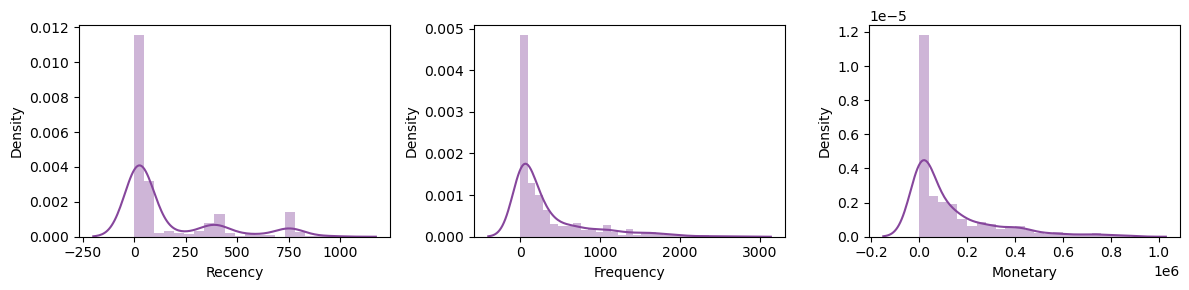

In [166]:
# visualizing the distribution of feature variables in RFM dataframe using distplot
fig, axis = plt.subplots(1,3, figsize= (12,3))

for i,feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.distplot(x= RFM[feature], kde= True, ax= axis[i], color= '#86469C', axlabel= feature)

plt.tight_layout()
plt.show()

In [167]:
print('Jumlah missing value :')
RFM.isnull().sum()

Jumlah missing value :


ResellerKey    0
Recency        0
Frequency      0
Monetary       0
dtype: int64

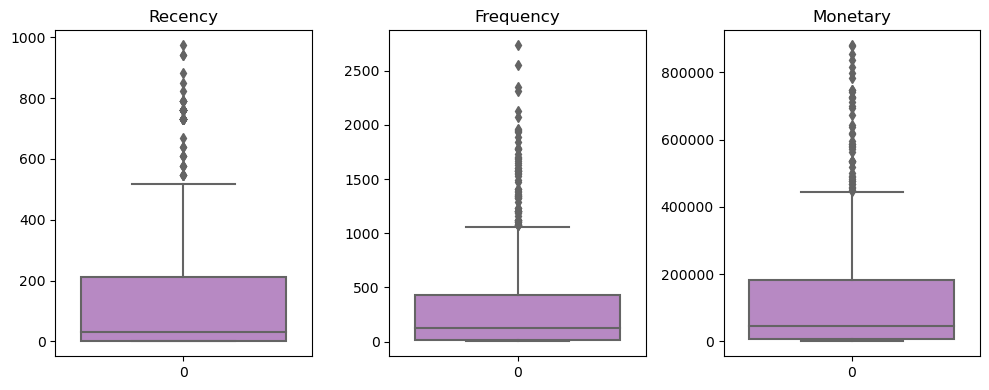

In [168]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))    
axes = axes.flatten()
col = RFM.drop('ResellerKey', axis=1).columns
for ax, i in zip(axes, col):
    sns.boxplot(RFM[i], ax=ax, color='#BC7FCD')
    ax.set_title(i)
    ax.set_ylabel('')
    ax.set_xlabel('')

fig.tight_layout()
plt.show()

In [169]:
def replace_outliers(df,columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        df[col] = df[col].mask(df[col]< lower_bound, lower_bound,axis=0)
        df[col] = df[col].mask(df[col]> upper_bound, upper_bound,axis=0)

    return df

In [170]:
rfm_column = RFM.drop('ResellerKey', axis=1).columns
df_clean = replace_outliers(RFM, rfm_column)

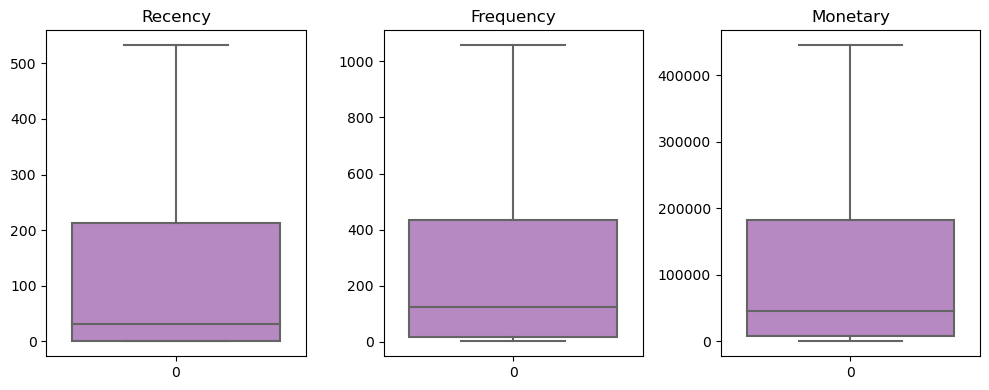

In [171]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))    
axes = axes.flatten()
col = RFM.drop('ResellerKey', axis=1).columns
for ax, i in zip(axes, col):
    sns.boxplot(df_clean[i], ax=ax, color='#BC7FCD')
    ax.set_title(i)
    ax.set_ylabel('')
    ax.set_xlabel('')

fig.tight_layout()
plt.show()

In [172]:
# importing required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [173]:
sc = StandardScaler()
df_clean = df_clean.drop('ResellerKey', axis=1)
df_trans = sc.fit_transform(df_clean)
df_trans = pd.DataFrame(df_trans,columns=df_clean.columns)
df_trans.head()

,Recency,Frequency,Monetary
0,2.115028,-0.472975,-0.234274
1,-0.557872,-0.257327,-0.648098
2,-0.723096,2.151214,1.675696
3,-0.397977,1.932765,2.252299
4,-0.723096,0.025536,-0.227369


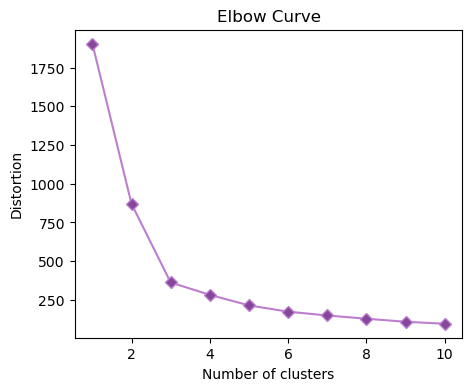

In [174]:
# Doing simulation to found the best K number
plt.figure(figsize=(5,4))
distortions = []

for i  in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_trans)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,color='#BC7FCD', marker='D', markerfacecolor='#86469C')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()

In [175]:
km = KMeans(n_clusters=3,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)

In [176]:
clusters = km.fit(df_trans)
labels = km.labels_

In [177]:
df_clean['Clusters'] = labels

In [178]:
df_clean.head(20)

,Recency,Frequency,Monetary,Clusters
0,532.5,121,85177.081200,0
1,31.0,198,25199.499400,2
2,0.0,1058,361999.058300,1
3,61.0,980,445569.043935,1
4,0.0,299,86177.847000,2
5,0.0,21,2676.654000,2
6,427.0,29,7780.338800,0
7,31.0,36,22181.729100,2
8,31.0,54,12634.979300,2
9,0.0,1058,434668.722170,1


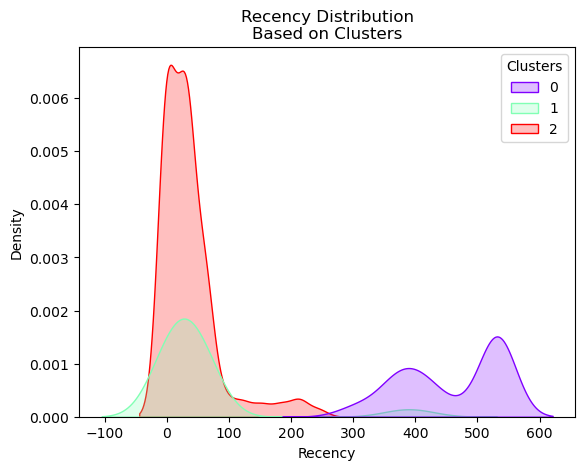

In [179]:
sns.kdeplot(data=df_clean, x='Recency', hue='Clusters', palette='rainbow', fill=True)
plt.title('Recency Distribution\nBased on Clusters');

**Recency** mengacu pada seberapa baru Reseller tersebut bertransaksi. Dari grafik di atas, terlihat bahwa reseller pada klaster 1, dan 2 rata-rata memiliki nilai Recency yang rendah, ini artinya reseller pada klaster tersebut pernah melakukan pemesanan pada beberapa bulan terakhir ini. Sedangkan reseller pada klaster 0 terlihat memiliki nilai Recency yang tinggi, ini berarti reseller tersebut sudah cukup lama tidak melakukan pemesanan kembali.

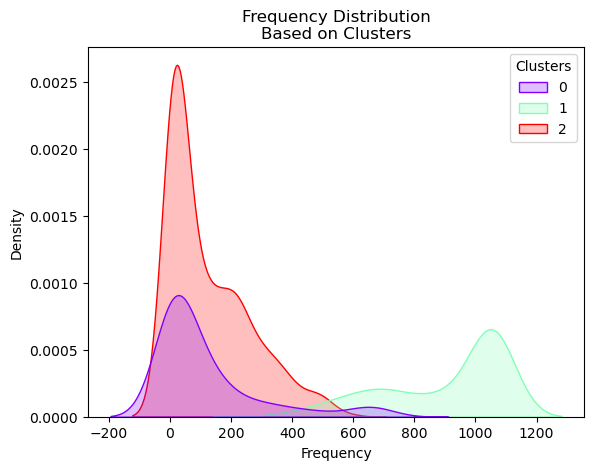

In [180]:
sns.kdeplot(data=df_clean, x='Frequency', hue='Clusters', palette='rainbow', fill=True)
plt.title('Frequency Distribution\nBased on Clusters');

**Frequency** mengacu pada seberapa sering Reseller melakukan transaksi atau berinteraksi dengan bisnis dalam periode waktu tertentu. Dari grafik di atas, terlihat bahwa Reseller pada cluster 1 memiliki nilai frequency tertinggi, ini artinya reseller tersebut paling banyak melakukan traksaksi. Sementara Klaster 0 dan 2 terlihat kurang banyak melakukan transaksi dibanding klaster 1.


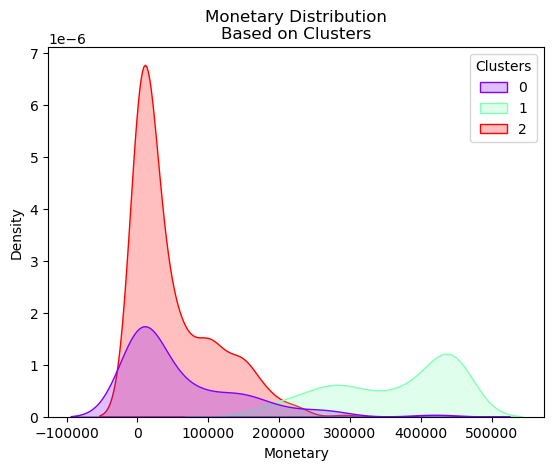

In [181]:
sns.kdeplot(data=df_clean, x='Monetary', hue='Clusters', palette='rainbow',fill=True)
plt.title('Monetary Distribution\nBased on Clusters');

**Monetary** mengacu pada jumlah uang yang dihabiskan oleh Reseller dalam suatu transaksi dalam periode waktu tertentu. Dari grafik di atas, terlihat bahwa Reseller pada cluster 1 memiliki nilai Monetary terbesar, ini artinya reseller tersebut paling banyak memberikan revenue dalam proses transaksi. Sementara Klaster 0 dan 2 terlihat kurang banyak memberikan revenue dibanding kalster 1.

Dari ketiga grafik di atas dapat disimpulkan:
1. **Klaster 1** :
    - reseller yang masih aktif melakukan transaksai beberapa bulan terakhir
    - paling banyak melakukan transaksi
    - paling banyak memberikan revenue
     
2. **Klaster 2** :
    - reseller yang cukup aktif melakukan transaksai beberapa bulan terakhir
    - sedikit melakukan transaksi
    - sedikit memberikan revenue
    
3. **Klaster 0** :
    - reseller yang jarang bahkan sudah lama tidak melakukan transaksi
    - paling sedikit melakukan transaksi
    - paling sedikit memberikan revenue
    
Dari karakteristik di atas maka saya akan memberikan nama klaster sesuai karakteristiknya, klaster 1 adalah **Platinum**, 2 untuk **Gold**, dan 0 untuk **Silver**.

In [182]:
df_clean['Clusters'].value_counts()

Clusters
2    354
0    145
1    136
Name: count, dtype: int64

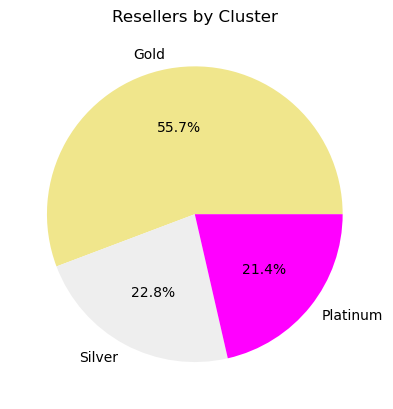

In [183]:
df_clean['Clusters'].value_counts().plot(kind='pie', colors=['khaki','#EEEEEE','magenta'], labels = ['Gold', 'Silver', 'Platinum'], autopct=('%.1f%%'))
plt.title('Resellers by Cluster')
plt.ylabel('');

In [184]:
result = RFM.drop(['Recency','Frequency','Monetary'], axis=1)
result['Clusters'] = labels
cluster_map = {0:'Silver',2:'Gold',1:'Platinum'}
result['Clusters'] = result['Clusters'].map(cluster_map)
result

,ResellerKey,Clusters
0,1,Silver
1,2,Gold
2,3,Platinum
3,4,Platinum
4,5,Gold
...,...,...
630,697,Platinum
631,698,Silver
632,699,Gold
633,700,Gold


# TERIMA KASIH